In [1]:
!pip install torch torchvision torchaudio matplotlib numpy tqdm

In [2]:
# base
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from PIL import Image

import torch
import torch.nn as nn
import torchvision

# helpers
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torchvision.transforms import v2
from itertools import product

In [3]:
torch.tensor([2,3,4,5], device=torch.device('cpu'))

tensor([2, 3, 4, 5])

In [4]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

y = x * 2

# gradients calculating
y.sum().backward()

print(x.grad)

tensor([2., 2., 2.])


In [5]:
x = torch.tensor([[2,4], [5,6], [8,9]], dtype=torch.float32, requires_grad=True)

# x.dtype
# x.shape
# x.size()
# x.ndim
x[0, 1].item()

4.0

In [6]:
tensor = torch.zeros([2,3,2])
print(tensor)

tensor1 = torch.ones([2,3,2])
print(tensor1)

tensor2 = torch.zeros_like(tensor1)
print(tensor2)

tensor3 = torch.full_like(tensor1, 5)
print(tensor3)

print(tensor3 * 10)
print(tensor3.sum())

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])
tensor([[[5., 5.],
         [5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.],
         [5., 5.]]])
tensor([[[50., 50.],
         [50., 50.],
         [50., 50.]],

        [[50., 50.],
         [50., 50.],
         [50., 50.]]])
tensor(60.)


In [7]:
tensor = torch.tensor([1,2,3,4,5,6], dtype=torch.float32)
tensor = tensor.view([2,3])
tensor_mean = tensor.mean(dim=1, keepdim=True) # keepdim=True save initial row were we calculate avarage

print(tensor)
print(tensor_mean)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[2.],
        [5.]])


In [8]:
print(torch.cpu.is_available())
print(torch.cuda.is_available())

True
False


In [9]:
tensor = torch.tensor([1.,2.,3.], requires_grad=True)
# tensor = tensor.cpu()
# tensor = tensor.to('cpu')

# tensor = tensor.cuda()
# tensor = tensor.to('cuda')

tensor

tensor([1., 2., 3.], requires_grad=True)

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

tensor = tensor.to(device)
print(tensor)
print(tensor.device)

cpu
tensor([1., 2., 3.], requires_grad=True)
cpu


### Image transformation

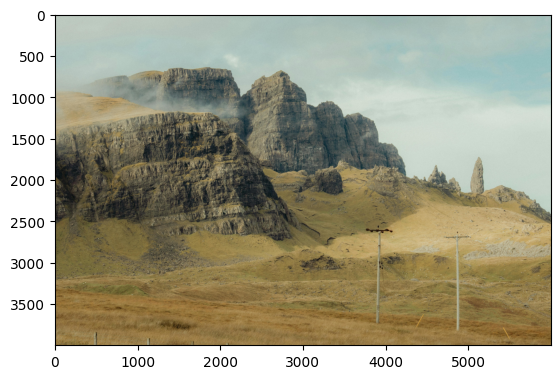

In [11]:
plt.imshow(Image.open('./public/img/preview-image-1.jpg'))

In [12]:
img = np.array(Image.open('./public/img/preview-image-1.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'numpy.ndarray'>
(4000, 6000, 3)
uint8
min = 0, max = 255


In [13]:
transform = transforms.ToTensor()
img_tensor = transform(img)

print(type(img_tensor))
print(img_tensor.shape)
print(img_tensor.dtype)
print(f'min = {img_tensor.min()}, max = {img_tensor.max()}')

<class 'torch.Tensor'>
torch.Size([3, 4000, 6000])
torch.float32
min = 0.0, max = 1.0


## First Model

In [14]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

In [15]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
input = torch.rand([16,784], dtype=torch.float32)
out = model(input)


print(f'Input: {input}')
print(f'Output: {out}')

Input: tensor([[4.3273e-04, 6.9044e-01, 9.1038e-01,  ..., 7.6265e-01, 3.4005e-01,
         1.5384e-01],
        [1.9938e-01, 5.0154e-01, 1.6254e-01,  ..., 2.3063e-01, 8.5079e-01,
         3.6385e-01],
        [2.4920e-02, 3.5385e-01, 5.1083e-01,  ..., 2.3227e-01, 3.5024e-01,
         3.6947e-01],
        ...,
        [9.4041e-01, 4.1614e-01, 2.4882e-01,  ..., 7.9657e-01, 7.5726e-01,
         4.5349e-01],
        [2.6069e-02, 4.1925e-01, 2.4935e-01,  ..., 5.9556e-01, 2.9175e-01,
         5.0162e-01],
        [1.8477e-01, 7.7614e-02, 3.8721e-01,  ..., 6.4887e-02, 6.2379e-01,
         9.5983e-01]])
Output: tensor([[-2.6164e-01,  4.8006e-02,  3.0264e-02,  1.1076e-02,  1.5407e-01,
         -1.1666e-01, -2.6042e-01, -4.2423e-02,  3.0630e-02,  2.1599e-01],
        [-2.8710e-01, -1.6509e-01,  1.9476e-05, -4.3470e-02,  1.5268e-01,
         -5.3823e-02, -1.7642e-01, -1.2260e-02,  1.8821e-01,  2.3693e-01],
        [-1.8141e-01, -6.7991e-02,  3.5812e-02,  6.1875e-02, -2.2401e-02,
          3.0454e

In [17]:
for parameter in model.parameters():
    print(parameter)
    print(parameter.shape, end='\n\n')

Parameter containing:
tensor([[-8.8541e-03,  3.4696e-02, -1.7089e-02,  ...,  9.6670e-03,
         -2.8120e-02,  4.8493e-06],
        [-2.6852e-02,  6.0900e-03,  2.7872e-03,  ...,  1.8539e-02,
          2.8259e-02, -3.4779e-02],
        [ 2.0718e-02, -2.7129e-02,  5.2357e-03,  ..., -3.3214e-02,
         -3.0855e-03, -2.3807e-03],
        ...,
        [-1.4418e-02,  1.5341e-02, -9.5308e-03,  ..., -1.2431e-02,
         -2.2345e-02, -1.6181e-02],
        [-1.4546e-02, -3.0230e-02,  3.5398e-03,  ...,  2.0450e-02,
          1.9403e-02, -5.5570e-03],
        [-7.3499e-03, -4.2584e-03, -4.2432e-03,  ..., -2.9963e-02,
          3.0438e-02,  1.0430e-02]], requires_grad=True)
torch.Size([128, 784])

Parameter containing:
tensor([-0.0294,  0.0209, -0.0294,  0.0254, -0.0165,  0.0249,  0.0293,  0.0300,
         0.0002, -0.0350, -0.0024,  0.0318, -0.0171,  0.0259,  0.0006, -0.0187,
         0.0259, -0.0352, -0.0252, -0.0178,  0.0211,  0.0165,  0.0258,  0.0126,
         0.0090,  0.0220, -0.0327,  0.00

## Second Model

In [18]:
model2 = nn.Sequential()

model2.add_module('layer_1', nn.Linear(784, 128))
model2.add_module('relu', nn.ReLU())
model2.add_module('layer_2', nn.Linear(128, 10))

In [19]:
model2

Sequential(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
)

## Third Model base on Class

In [20]:
class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.layer_1 = nn.Linear(input_size, 128)
        self.layer_2 = nn.Linear(128, output_size)
        self.act = nn.ReLU()
    
    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)
        
        return out
        
model3 = MyModel(784, 10)

In [21]:
out = model(input)
out.shape

torch.Size([16, 10])

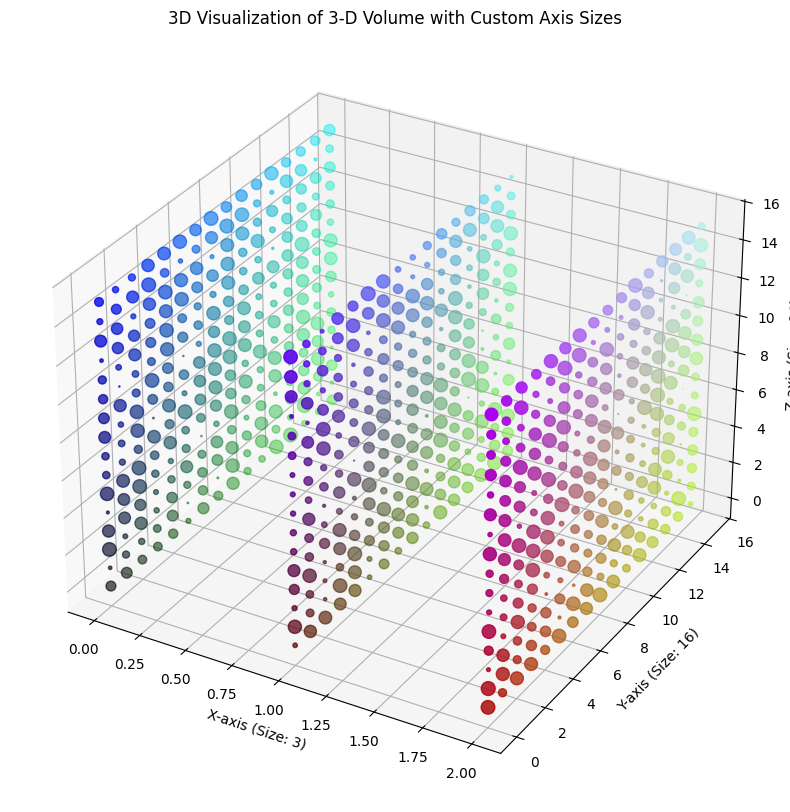

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

class VolumeVisualizer3D:
    def __init__(self, Nx=8, Ny=8, Nz=8, dimensions=3):
        """
        Ініціалізація класу для візуалізації об'ємних даних.
        
        Parameters:
        - Nx, Ny, Nz: Розміри вздовж кожної з осей.
        - dimensions: Кількість вимірів масиву (1 для 1D, 2 для 2D, 3 для 3D).
        """
        self.Nx = Nx
        self.Ny = Ny
        self.Nz = Nz
        self.dimensions = dimensions
        self.volume = None
        self.space = None

    def generate_volume(self):
        """
        Генерація об'ємних даних залежно від заданої кількості вимірів.
        """
        if self.dimensions == 1:
            self.volume = np.random.rand(self.Nx)
            self.space = np.arange(self.Nx)  # Координати для 1D
        elif self.dimensions == 2:
            self.volume = np.random.rand(self.Nx, self.Ny)
            self.space = np.array([*product(range(self.Nx), range(self.Ny))])
        else:
            self.volume = np.random.rand(self.Nx, self.Ny, self.Nz)
            self.space = np.array([*product(range(self.Nx), range(self.Ny), range(self.Nz))])

    def plot(self):
        """
        Візуалізація об'ємних даних у тривимірному просторі.
        """
        if self.volume is None or self.space is None:
            self.generate_volume()

        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection="3d")

        if self.dimensions == 1:
            ax.scatter(self.space, np.zeros_like(self.space), np.zeros_like(self.space),
                       c=self.space / self.Nx, s=self.volume * 300)
        elif self.dimensions == 2:
            ax.scatter(self.space[:, 0], self.space[:, 1], np.zeros(self.space.shape[0]),
                       c=self.space[:, 0] / self.Nx, s=self.volume.flatten() * 300)
        else:
            ax.scatter(self.space[:, 0], self.space[:, 1], self.space[:, 2],
                       c=self.space / [self.Nx, self.Ny, self.Nz], s=self.volume.flatten() * 100)

        ax.set_xlabel(f'X-axis (Size: {self.Nx})')
        ax.set_ylabel(f'Y-axis (Size: {self.Ny})')
        ax.set_zlabel(f'Z-axis (Size: {self.Nz})')

        plt.title(f'3D Visualization of {self.dimensions}-D Volume with Custom Axis Sizes')
        plt.show()

visualizer = VolumeVisualizer3D(Nx=3, Ny=16, Nz=16, dimensions=3)
visualizer.plot()
